In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [31]:
og_data = sns.load_dataset("iris")

In [32]:
data = og_data.copy()

In [33]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
f_var = data.iloc[:,:-1]
f_var

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
c_var = data.iloc[:,-1]
c_var

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [36]:
c_var = c_var.map({"setosa":0,"versicolor":1,"virginica":2}) #converting string class labels to number
c_var

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [37]:
import sklearn
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(f_var,c_var,test_size=0.2) #random splitting

In [39]:
x_train,x_test,y_train,y_test = train_test_split(f_var,c_var,test_size=0.2,stratify=c_var) #stratified sampling

In [40]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x_train,y_train)

In [42]:
y_cap = model.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_cap)

0.9666666666666667

In [45]:
acc_dict = {}
for k in range(1,120,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(x_train,y_train)
    y_cap = model.predict(x_test)
    score = accuracy_score(y_test,y_cap)
    acc_dict[k] = score

In [46]:
acc_dict

{1: 0.9666666666666667,
 3: 0.9666666666666667,
 5: 0.9666666666666667,
 7: 0.9666666666666667,
 9: 0.9666666666666667,
 11: 0.9666666666666667,
 13: 0.9666666666666667,
 15: 0.9666666666666667,
 17: 0.9666666666666667,
 19: 0.9666666666666667,
 21: 0.9666666666666667,
 23: 0.9666666666666667,
 25: 0.9666666666666667,
 27: 0.9666666666666667,
 29: 0.9666666666666667,
 31: 0.9666666666666667,
 33: 0.9666666666666667,
 35: 0.9666666666666667,
 37: 0.9666666666666667,
 39: 0.9333333333333333,
 41: 0.9333333333333333,
 43: 1.0,
 45: 0.9666666666666667,
 47: 0.9666666666666667,
 49: 0.9666666666666667,
 51: 0.9666666666666667,
 53: 0.9333333333333333,
 55: 0.9666666666666667,
 57: 0.9666666666666667,
 59: 0.9333333333333333,
 61: 0.9333333333333333,
 63: 0.9666666666666667,
 65: 0.9333333333333333,
 67: 0.9,
 69: 0.9,
 71: 0.9333333333333333,
 73: 0.9333333333333333,
 75: 0.9,
 77: 0.8666666666666667,
 79: 0.8666666666666667,
 81: 0.6666666666666666,
 83: 0.6666666666666666,
 85: 0.66666666

In [47]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'accuracy_score')

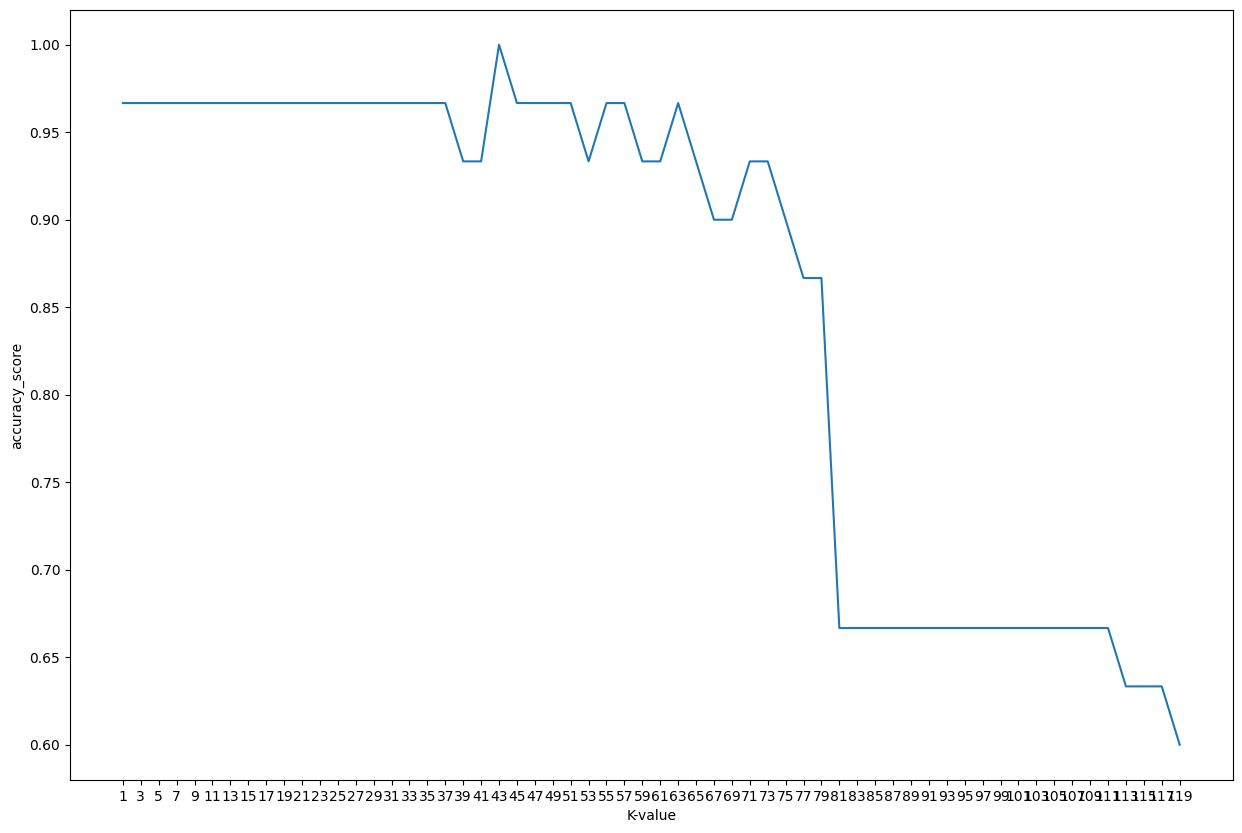

In [48]:
plt.figure(figsize=(15,10))
sns.lineplot(x = list(acc_dict.keys()),y = list(acc_dict.values()))
plt.xticks(list(acc_dict.keys()))
plt.xlabel("K-value")
plt.ylabel("accuracy_score")

### this not a correct way to implement because you are using dtrain and dtest for finding kvalue and accuracy

## we can use stratified k-fold-cross validation for classification and k-fold cross validation for regression

In [49]:
from sklearn.model_selection import cross_val_score,cross_validate

In [50]:
x_train,x_test,y_train,y_test = train_test_split(f_var,c_var,test_size=0.2,stratify=c_var)

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
cross_val_score(estimator=knn,X=x_train,y=y_train,cv=3,scoring="accuracy").mean()

np.float64(0.975)

## number of train points = (x_train/cv)*(cv-1)

#### here cv=3,x_train = 120 points (120/3)(3-1)=80 points

In [57]:
acc = []
k = []
for i in range(1,81,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    acc.append(cross_val_score(estimator=knn,X=x_train,y=y_train,cv=3,scoring="accuracy").mean())
    k.append(i)

In [58]:
print(k)
print(acc)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79]
[np.float64(0.975), np.float64(0.9833333333333334), np.float64(0.975), np.float64(0.9833333333333334), np.float64(0.975), np.float64(0.9583333333333334), np.float64(0.9666666666666667), np.float64(0.9666666666666667), np.float64(0.9500000000000001), np.float64(0.9500000000000001), np.float64(0.9249999999999999), np.float64(0.9333333333333332), np.float64(0.9333333333333332), np.float64(0.9166666666666666), np.float64(0.9249999999999999), np.float64(0.9083333333333333), np.float64(0.9), np.float64(0.9), np.float64(0.9083333333333332), np.float64(0.8916666666666666), np.float64(0.8916666666666666), np.float64(0.8916666666666666), np.float64(0.9), np.float64(0.8833333333333333), np.float64(0.8666666666666667), np.float64(0.8916666666666666), np.float64(0.7999999999999999), np.float64(0.7166666666666667), np.float64(0.6833333333333335),

Text(0, 0.5, 'accuracy_score')

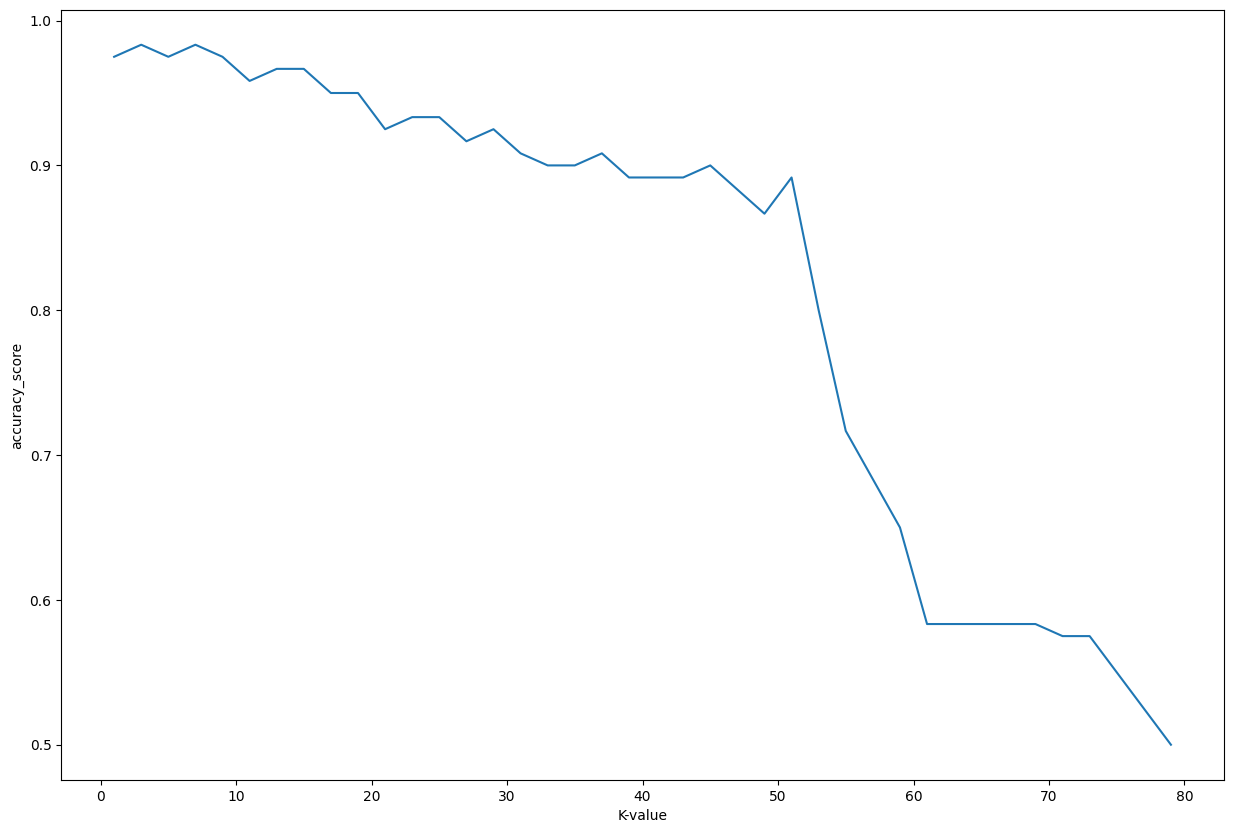

In [59]:
plt.figure(figsize=(15,10))
sns.lineplot(x=k,y=acc)
plt.xlabel("K-value")
plt.ylabel("accuracy_score")